In [1]:
!pip install pandas numpy matplotlib seaborn

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
df = pd.read_csv('/content/Titanic Dataset.csv')

In [62]:
print(df.shape)  # Rows and columns
print(df.info())  # Data types and missing values
print(df.head())  # First 5 rows

(1309, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1    

In [63]:
print(df.describe())  # Numerical features


            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881138     0.498854     0.385027   
std       0.837836     0.486055    14.413493     1.041658     0.865560   
min       1.000000     0.000000     0.170000     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


In [64]:
print(df.describe(include='object'))  # Categorical features

                        name   sex    ticket        cabin embarked boat  \
count                   1309  1309      1309          295     1307  486   
unique                  1307     2       929          186        3   27   
top     Connolly, Miss. Kate  male  CA. 2343  C23 C25 C27        S   13   
freq                       2   843        11            6      914   39   

           home.dest  
count            745  
unique           369  
top     New York, NY  
freq              64  


In [65]:
print(df.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [66]:
df['age'] = df['age'].fillna(df['age'].median())

In [67]:
df['embarked']

0       S
1       S
2       S
3       S
4       S
       ..
1304    C
1305    C
1306    C
1307    C
1308    S
Name: embarked, Length: 1309, dtype: object

In [68]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [69]:
df['embarked'].isnull().sum()

0

In [70]:
df.isnull().sum()


pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [71]:
df.drop('cabin', axis=1, inplace=True)

In [72]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [73]:
df.drop('boat', axis=1, inplace=True)
df.drop('body', axis=1, inplace=True)
df.drop('home.dest', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)

In [74]:
df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        1
embarked    0
dtype: int64

In [75]:
df['fare'] = df['fare'].fillna(df['fare'].median())

In [76]:
df.isnull().sum()


pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

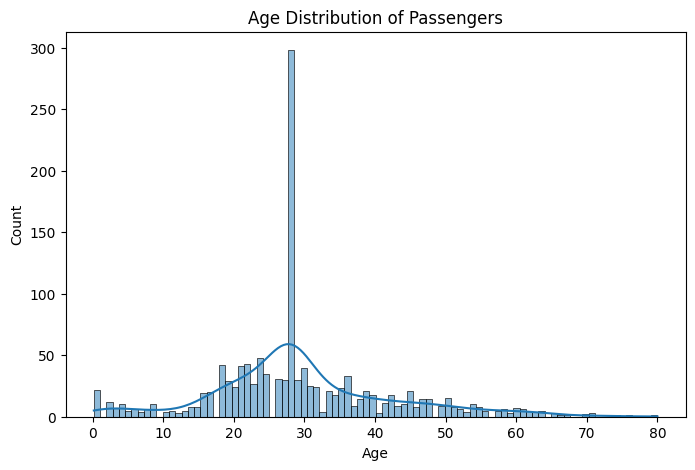

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=90, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

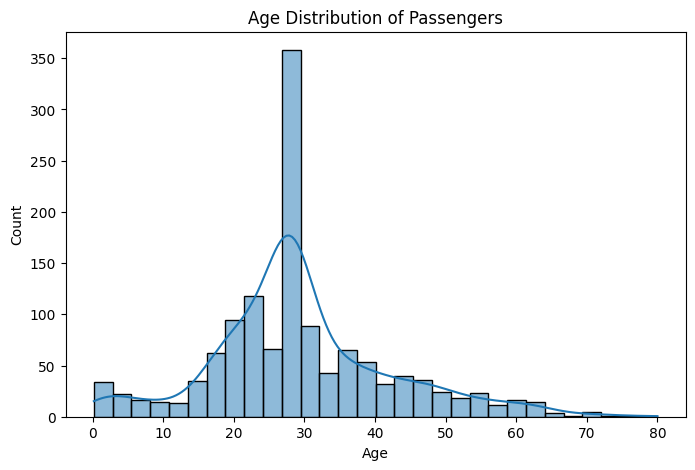

In [78]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [79]:
df.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'embarked'],
      dtype='object')

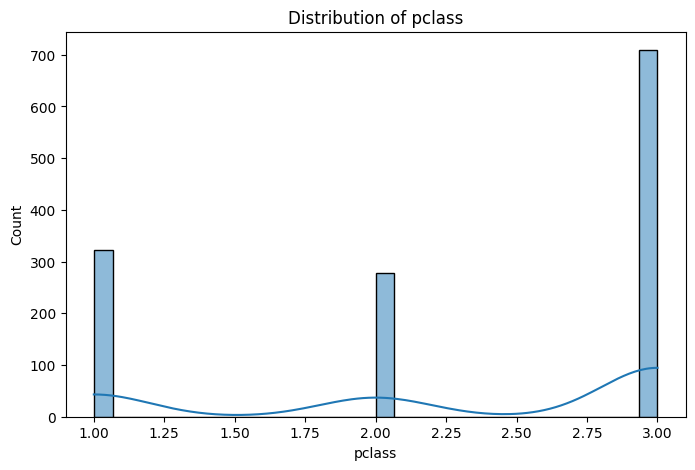

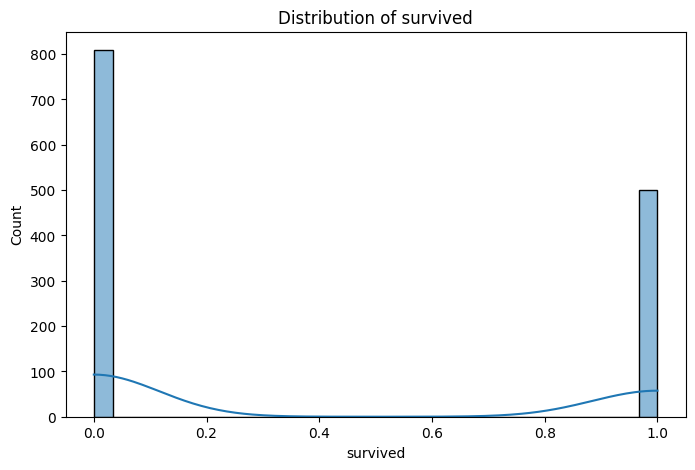

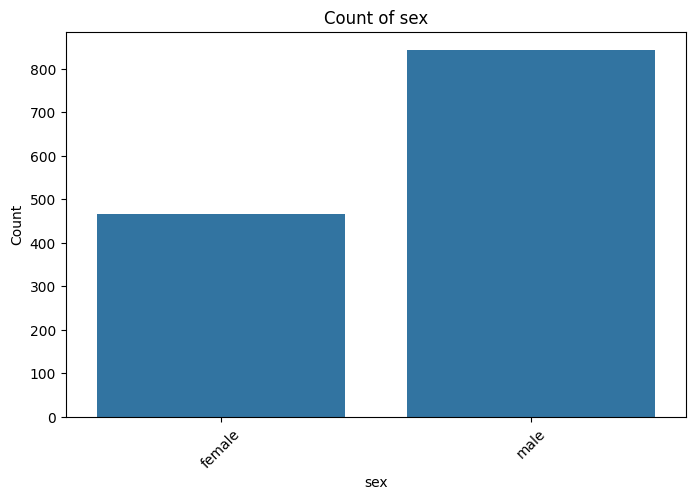

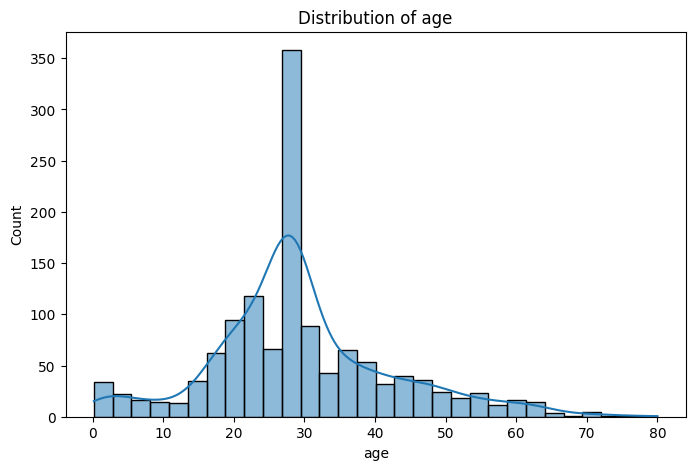

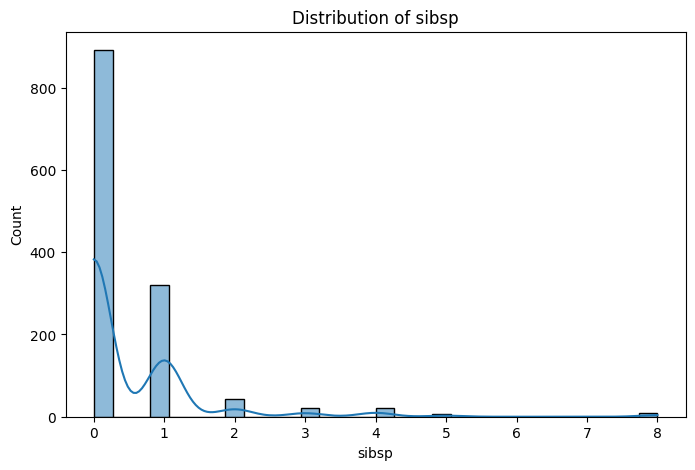

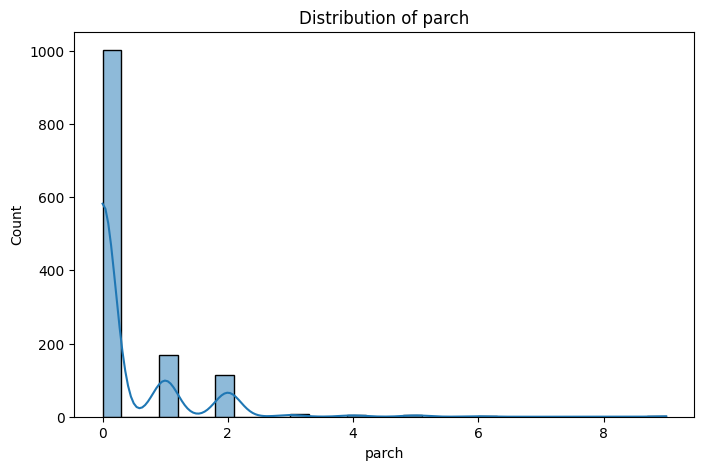

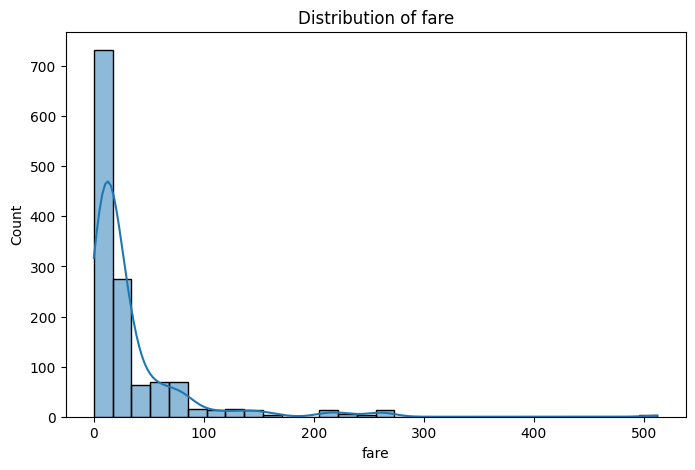

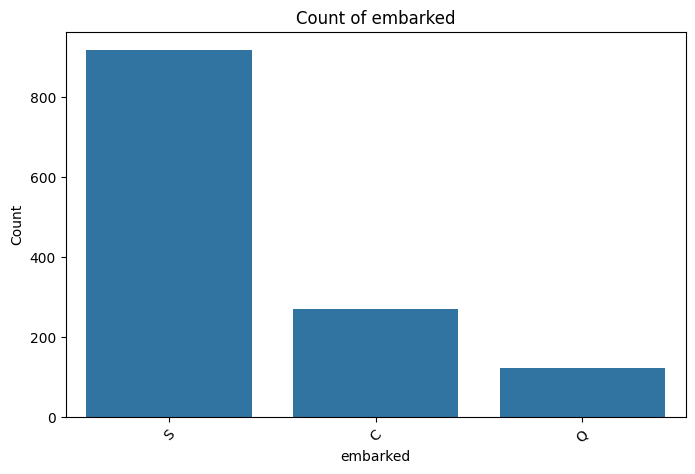

In [80]:
skip_columns = [ 'ticket', 'cabin', 'boat']


for column in df.columns:
    if column in skip_columns:
        continue

    plt.figure(figsize=(8, 5))


    if df[column].dtype in ['float64', 'int64']:
        sns.histplot(df[column], bins=30, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')


    elif df[column].dtype == 'object' or df[column].nunique() < 10:
        sns.countplot(x=column, data=df)
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

    else:
        print(f"Skipping {column} - not suitable for plotting")
        plt.close()
        continue

    plt.show()

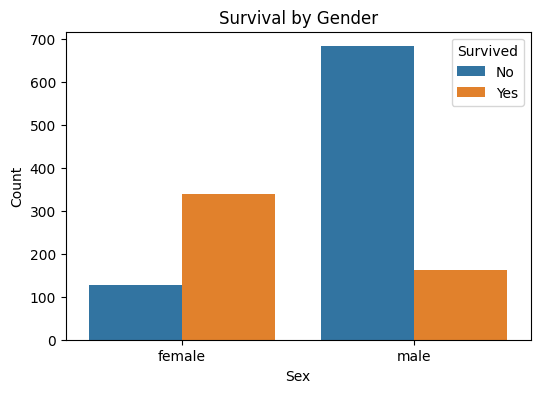

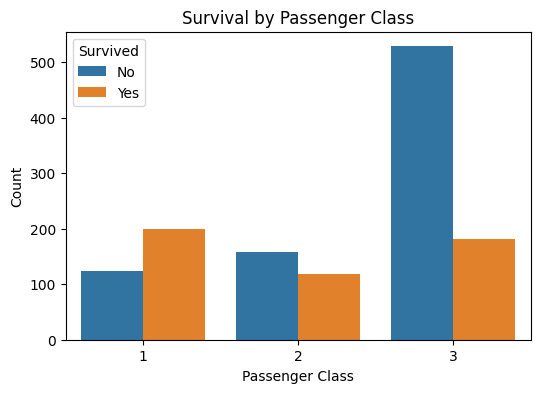

In [81]:
train_df = df.dropna(subset=['survived'])

# 1. Survival by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='survived', data=train_df)
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend
plt.show()

# 2. Survival by Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(x='pclass', hue='survived', data=train_df)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

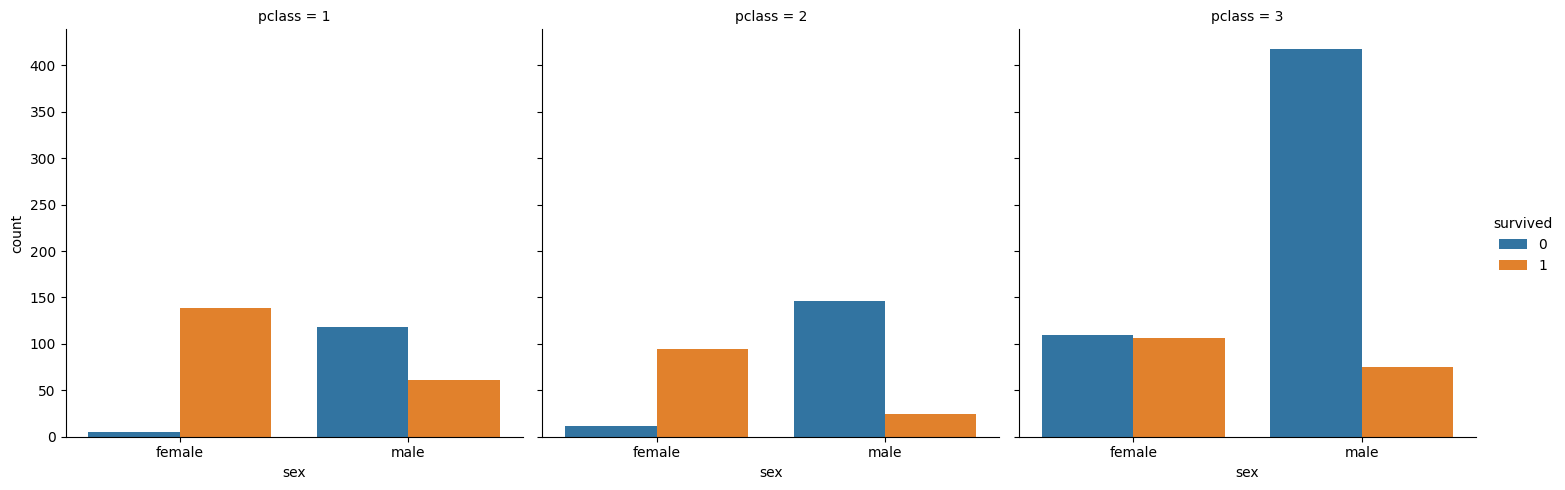

In [82]:
sns.catplot(x='sex', hue='survived', col='pclass', kind='count', data=train_df)

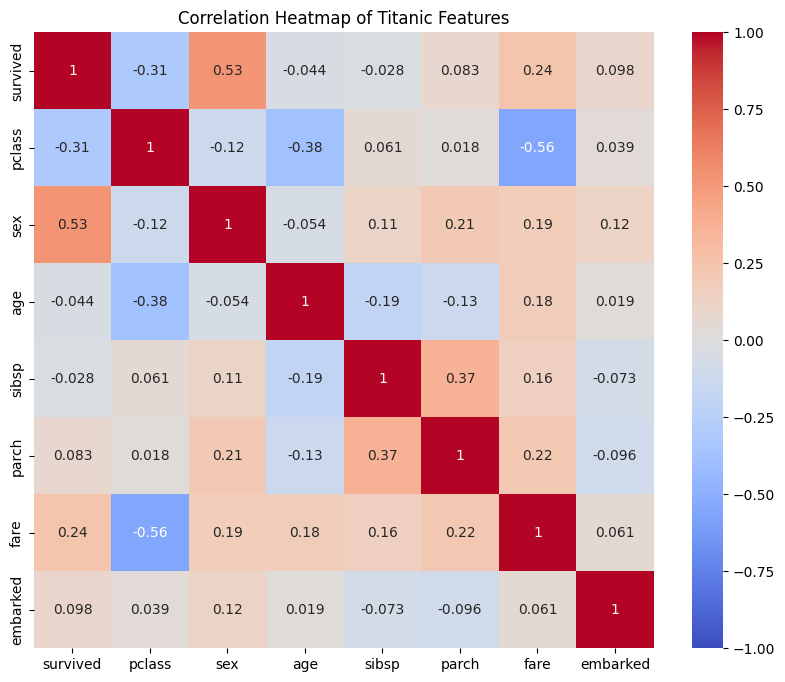

In [83]:
train_df['sex'] = train_df['sex'].map({'male': 0, 'female': 1})
train_df['embarked'] = train_df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Select numerical columns for correlation
corr_columns = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

# Create correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[corr_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Titanic Features')
plt.show()

"""
### Correlation Insights
- 'sex' (0.53) strongly predicts survival—females survived more.
- 'pclass' (-0.31) and 'fare' (0.24) show wealth influenced survival.
- 'age' (-0.044) and family size ('sibsp', 'parch') have little linear impact.
"""

### Key Findings from Titanic EDA

1. **Data Preparation**:
   - Successfully handled missing values in `'age'`, `'embarked'`, and dropped `'cabin'`, ensuring a clean dataset with 1309 rows (train + test combined).

2. **Distributions**:
   - **Age**: Most passengers were 20-40 years old, with a right-skewed distribution (fewer older passengers).
   - **Fare**: Fares were heavily skewed, with most below 50, but some outliers paid over 200, reflecting class differences.
   - **Survival Patterns**: Females and 1st class passengers had significantly higher survival counts, hinting at priority in lifeboat access.

3. **Correlations**:
   - **Gender Impact**: `'sex'` (0.53) showed a strong positive correlation with `'survived'—females (1) survived more, likely due to "women and children first."
   - **Wealth Influence**: `'pclass'` (-0.31) and `'fare'` (0.24) indicated wealthier passengers (1st class, higher fares) had better survival odds, a heartbreaking reflection of inequality.
   - **Age and Family**: `'age'` (-0.044), `'sibsp'` (-0.028), and `'parch'` (0.083) had weak linear correlations, suggesting age or family size didn’t directly drive survival.

4. **Overall Story**:
   - Survival on the Titanic was heavily influenced by gender and wealth. Females and 1st class passengers, who paid more, had a clear advantage, while class and fare underscored socio-economic disparities in the disaster’s outcome.


- EDA revealed patterns through visualizations and correlations, showing how to combine plots and numbers.
- Handling missing data and automating plots (e.g., with loops) saved time and built skills.
- Correlations highlighted linear relationships but also their limits (e.g., non-linear age effects).

NOW **moving with advanced technique of data anlysis**

In [84]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.1/392.1 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 83.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5cff820bc4a648aa5398bb057a8dc7a0cc62b1dce7e789b2dbd9fb49af5cab01
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [85]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Titanic Dataset Profiling Report", explorative=True)

profile.to_notebook_iframe()

# save it to HTML
profile.to_file("titanic_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [86]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 81.5 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


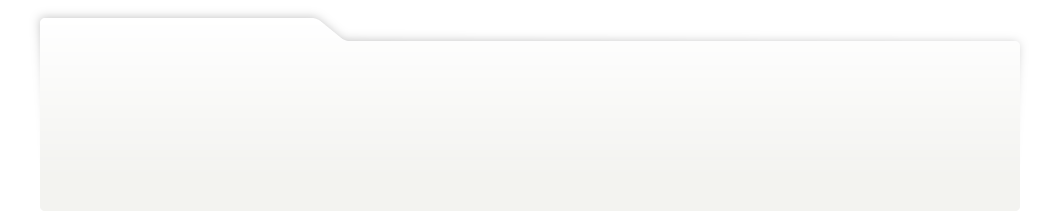
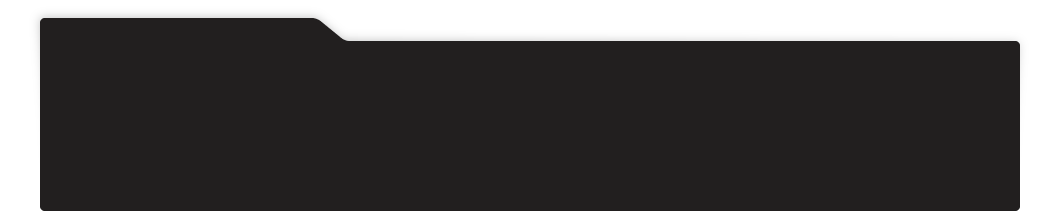
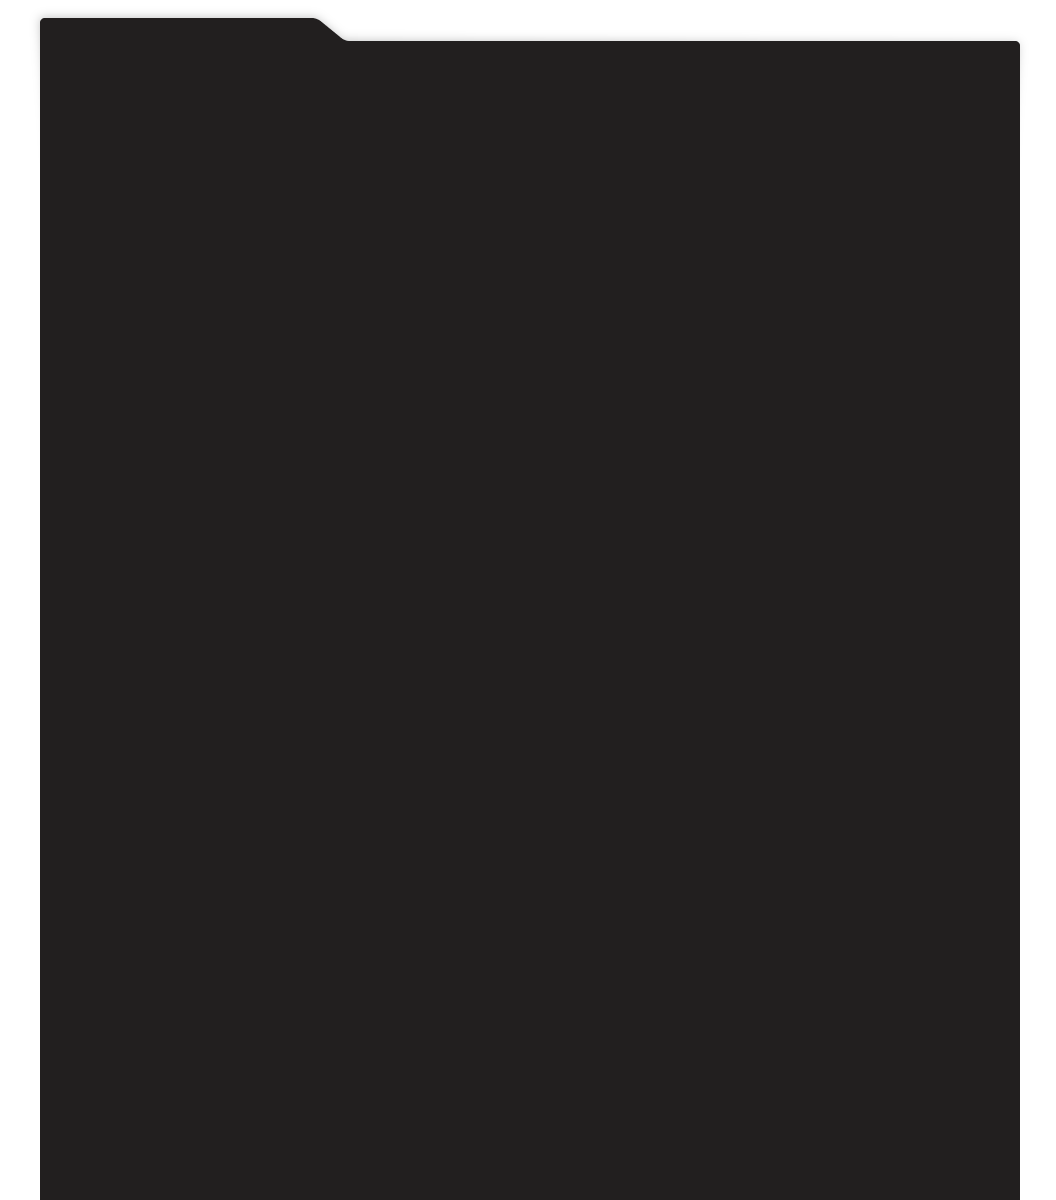
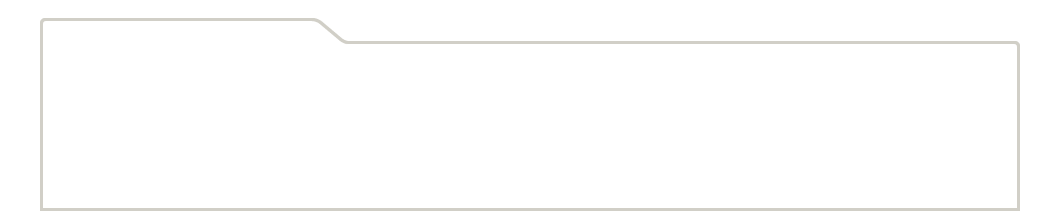
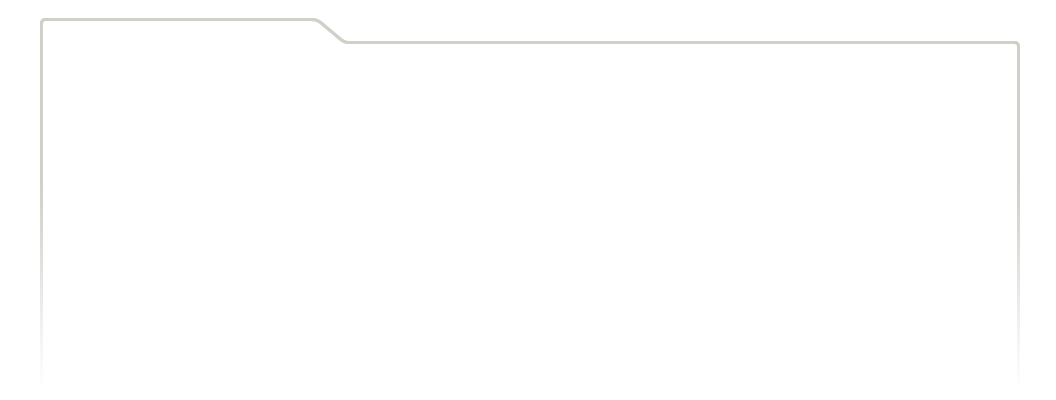
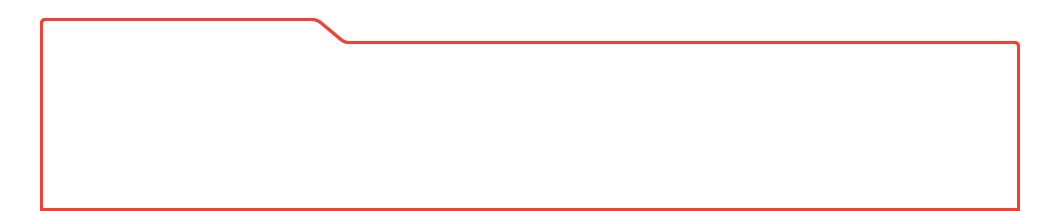
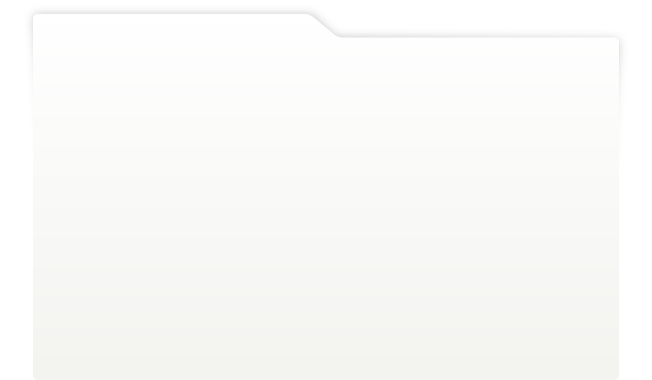
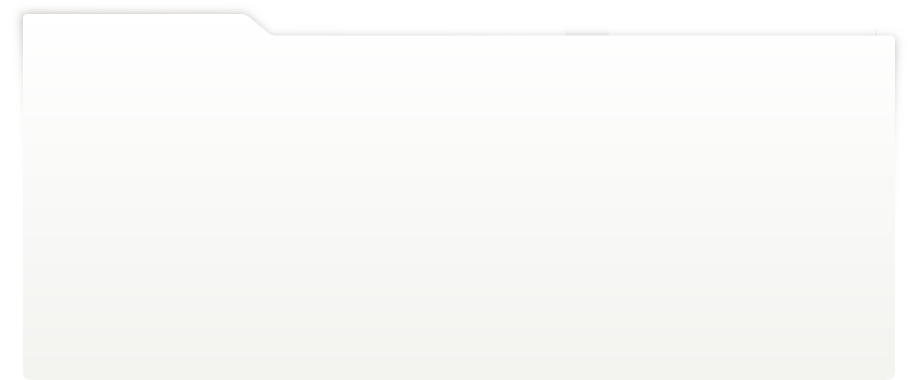
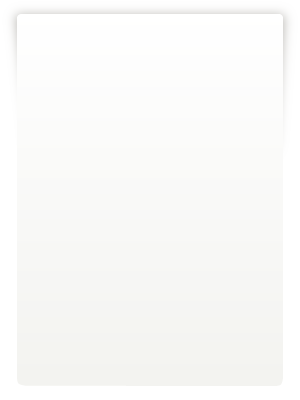
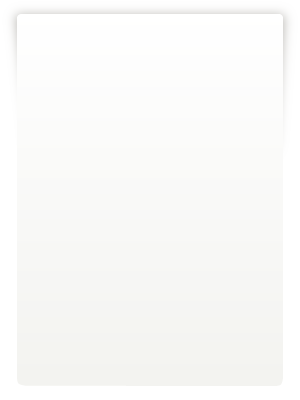
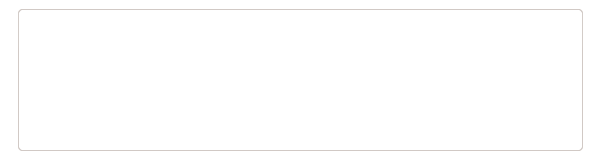
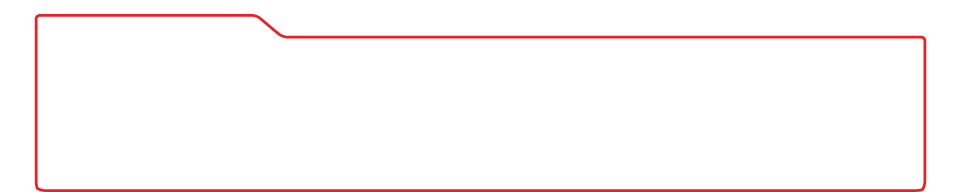
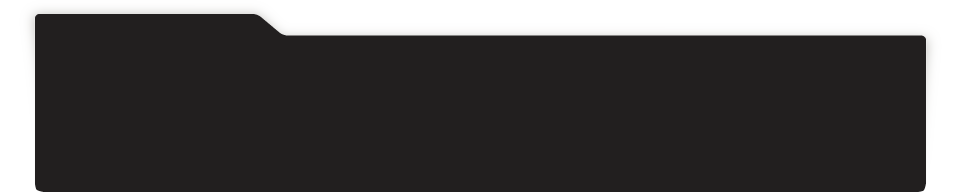
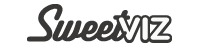
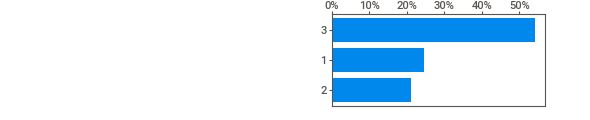
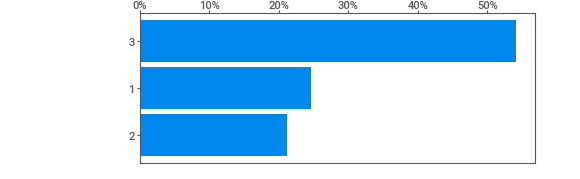
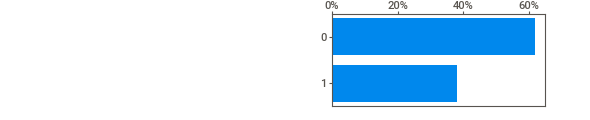
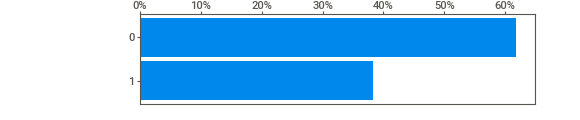
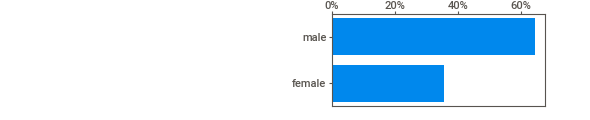
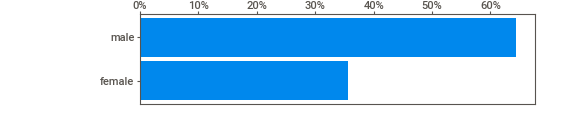
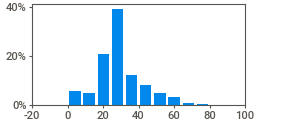
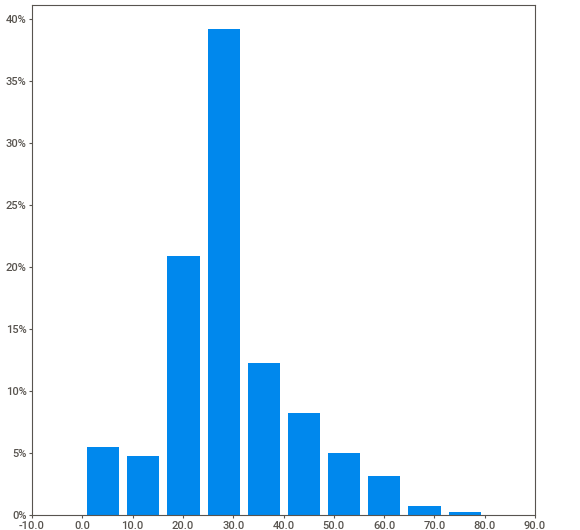
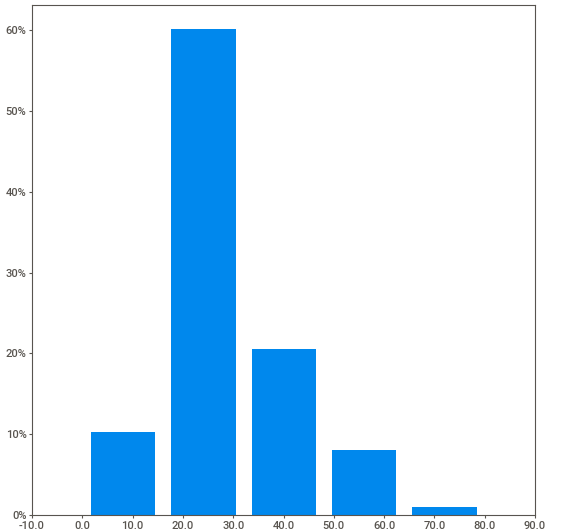
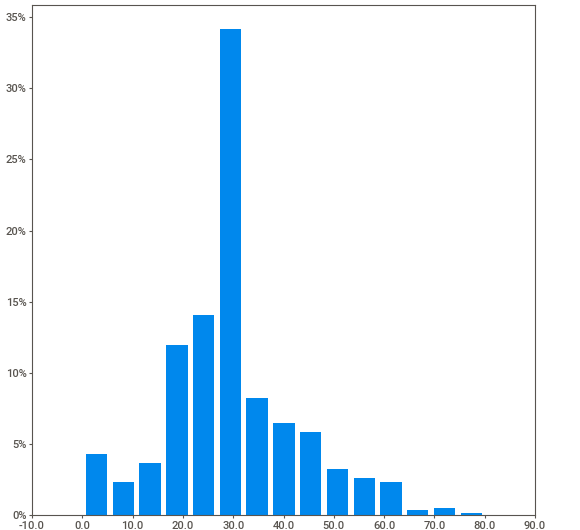
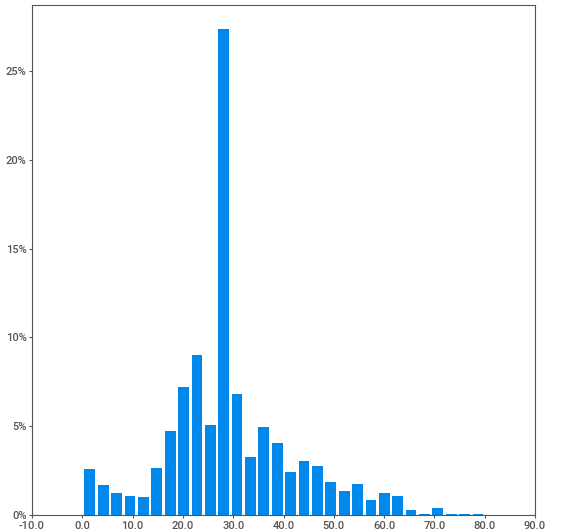
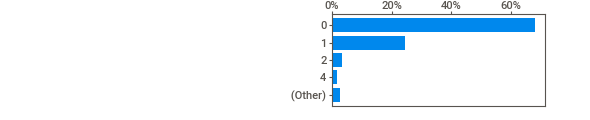
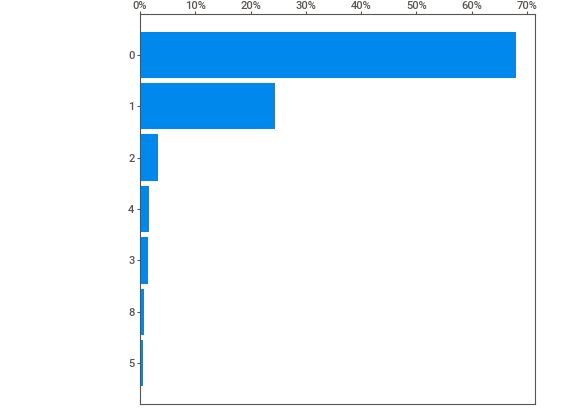
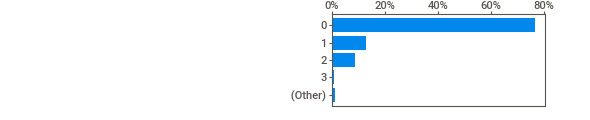
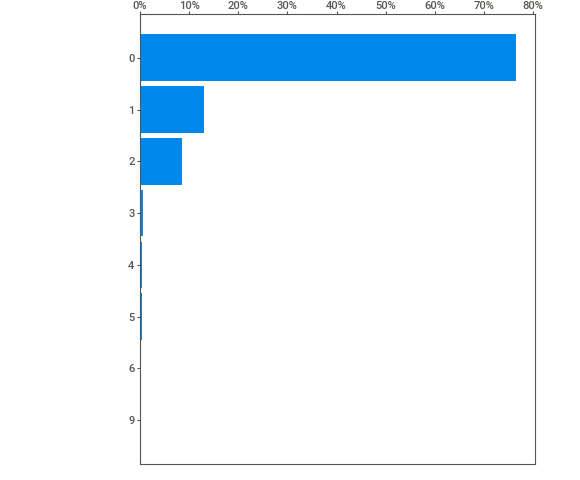
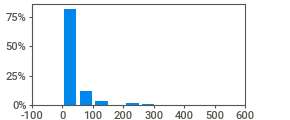
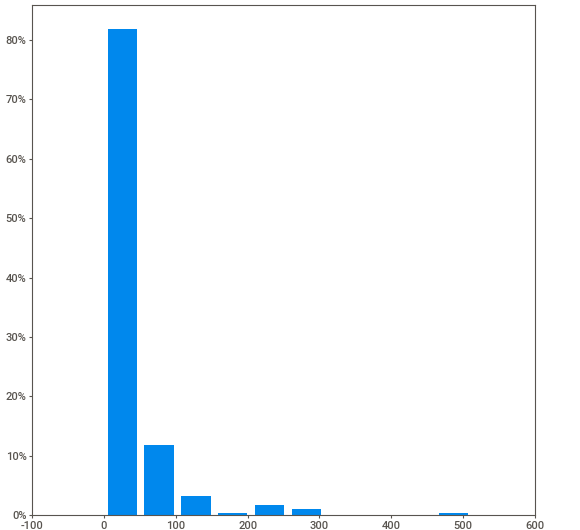
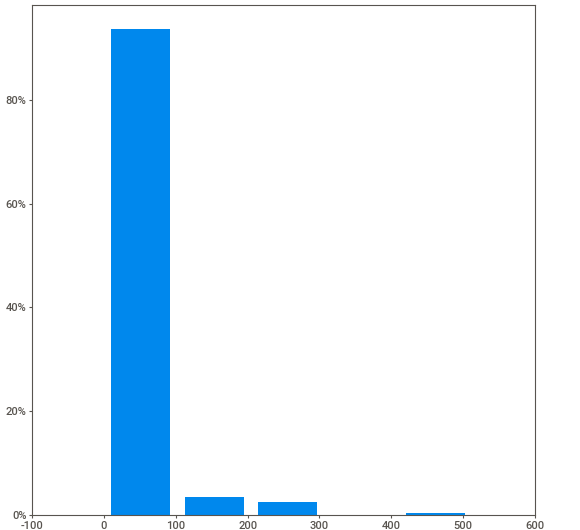
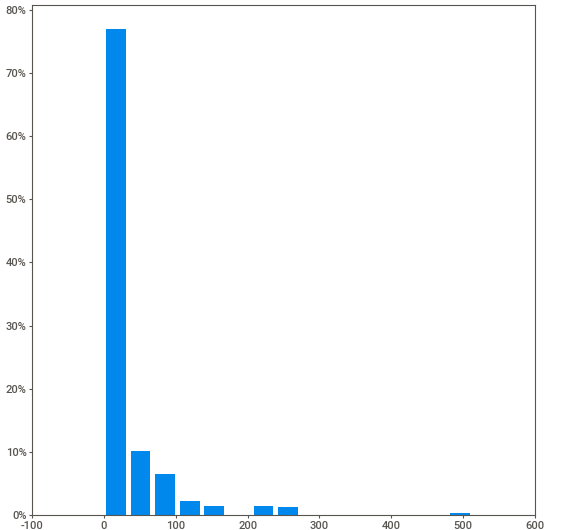
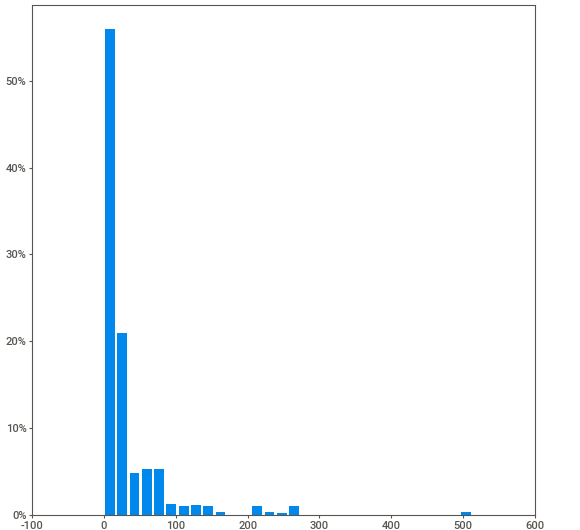
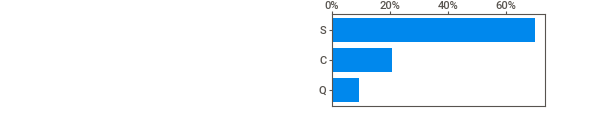
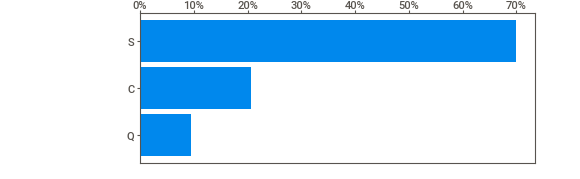
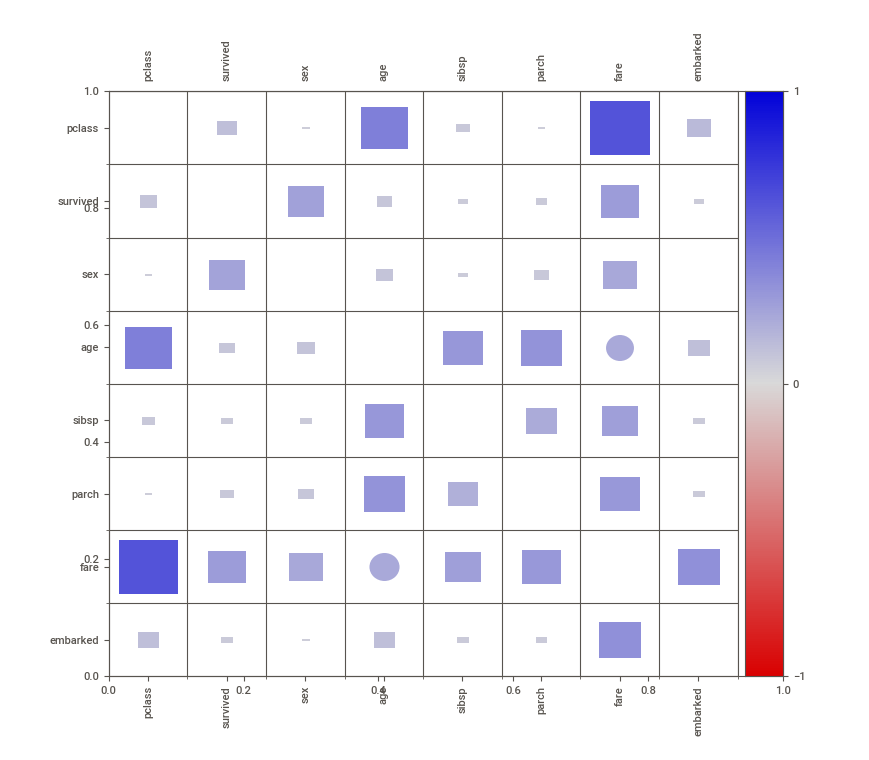
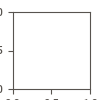

                                             |          | [  0%]   00:00 -> (? left)

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [88]:
import sweetviz as sv


report = sv.analyze(df)


report.show_notebook()


train_df = df[df['survived'].notnull()]
test_df = df[df['survived'].isnull()]
compare_report = sv.compare([train_df, "Train"], [test_df, "Test"])
compare_report.show_notebook()

In [90]:
!pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 31.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 44.3 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=

In [91]:
import dtale


d = dtale.show(df)


d

http://74feed7fe8bd:40000/dtale/main/1

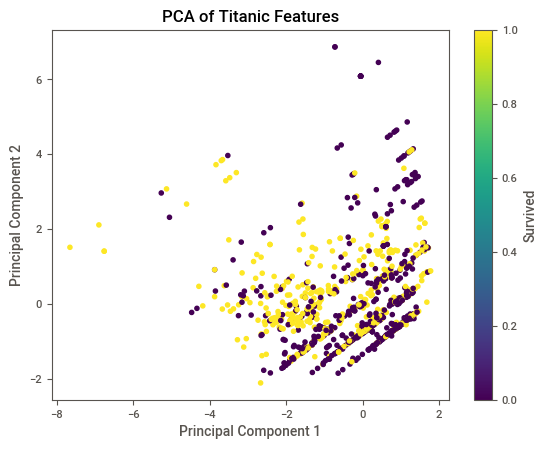

In [92]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features
features = ['pclass', 'age', 'sibsp', 'parch', 'fare']
X = train_df[features].fillna(0)  # Train data only

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=train_df['survived'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Titanic Features')
plt.colorbar(label='Survived')
plt.show()